In [1]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16


In [2]:
!tar -xf img1_1k.tar.gz

In [3]:
import os
train = os.listdir('img1_1k')[:200]

In [4]:
import cv2 
import numpy as np
from IPython.display import Image 
from IPython.display import display 

descriptors = list() 
for pic_path in train:
    
    img = cv2.imread('img1_1k/' + pic_path) 
    if img is not None: 
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
      
        sift = cv2.xfeatures2d.SIFT_create() 
        kp, des = sift.detectAndCompute(gray, None) 
        if des is not None: 
            sorted_idx = sorted(range(len(kp)), key = lambda x: kp[x].response, reverse=True) 
            best_des = [des[i] for i in sorted_idx] 
            for d in best_des[:50]: 
                d = d / np.linalg.norm(d)
                d[np.argwhere(d > 0.2)] = 0.2
                d = d / np.linalg.norm(d)
                descriptors.append(d)

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=1000, random_state = 1337)
kmeans.fit(descriptors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1000, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1337, tol=0.0001, verbose=0)

In [6]:
full_data = os.listdir('img1_1k')
features = dict()
for pic_path in full_data:
    descriptors = list() 
    img = cv2.imread('img1_1k/' + pic_path) 
    if img is not None: 
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
   
        sift = cv2.xfeatures2d.SIFT_create() 
        kp, des = sift.detectAndCompute(gray, None) 
        if des is not None: 
            sorted_idx = sorted(range(len(kp)), key = lambda x: kp[x].response, reverse=True) 
            best_des = [des[i] for i in sorted_idx] 
            for d in best_des[:50]: 
                 d = d / np.linalg.norm(d)
                 d[np.argwhere(d > 0.2)] = 0.2
                 d = d / np.linalg.norm(d)
                 descriptors.append(d)
            cur_features = kmeans.predict(descriptors)   
            features[pic_path] = cur_features
        

In [7]:
res = dict()
for cur_pic in features.items():
    intersection = []    
    for other_pic in features.items():
        if cur_pic[0] == other_pic[0]:
            continue
        intersection.append(len(np.intersect1d(cur_pic[1], other_pic[1])))

    num_dup = np.argwhere(intersection == np.amax(intersection))

    res[cur_pic[0]] = np.array(list(features.keys()))[num_dup]

In [8]:
res['6a648a33790334e9.jpg']

array([['1feff6d1c150fb33.jpg']], dtype='<U20')

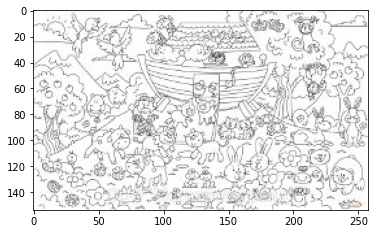

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('img1_1k/6a648a33790334e9.jpg')
imgplot = plt.imshow(img)
plt.show()

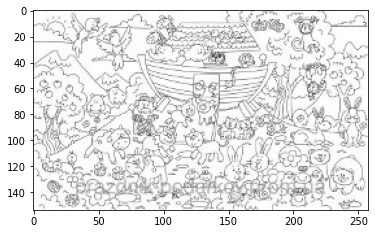

In [10]:
img = mpimg.imread('img1_1k/1feff6d1c150fb33.jpg')
imgplot = plt.imshow(img)
plt.show()